In [1]:
from shubov_algorithms import support_vector_machine,helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  support vector machine (task: iris plants)

In [2]:
def test_svm(features, targets, epochs=100, svm_lambda=1, print_stat=False):

    ## split features into test and train datasets
    features_train, features_test = helpers.split_data(features)

    ## transform targets (one-to-rest)
    targets_one_to_rest = helpers.split_targets_one_to_rest(targets, percentage=0.7)

    ## number of features
    number_of_features = len(features_train[0])

    ## hyper parameters for SVM
    lmbd = svm_lambda
    D = number_of_features

    list_loss=[]
    list_accuracy=[]
    list_true_positives=[]
    list_true_negatives=[]
    
    for class_name, targets in targets_one_to_rest:
        
        loss_list = []
        acc_list = []
        tp_list = []
        tn_list = []

        target_train, target_test = targets
        
        if print_stat:
            print("---------------------------- " + class_name +" to rest")

        for i in range(epochs):

            model = support_vector_machine.SVM(lmbd, D, iterator)

            model.learn(features_train, target_train)

            l, acc, tp, tn = model.test(features_test, target_test)

            loss_list.append(l)
            acc_list.append(acc)
            tp_list.append(tp)
            tn_list.append(tn)

        loss = np.mean(loss_list)
        accuracy = np.mean(acc_list) * 100
        true_positives = np.mean(tp_list) * 100
        true_negatives = np.mean(tn_list) * 100

        if print_stat:
            print('Accuracy', round(accuracy, 2), '%')
            print('True Positives', round(true_positives, 2), '%')
            print('True Negatives', round(true_negatives, 2), '%')
            print('Loss', round(loss, 2))
        
        list_loss.append(loss)
        list_accuracy.append(accuracy)
        list_true_positives.append(true_positives)
        list_true_negatives.append(true_negatives)
        
    return np.mean(list_loss),np.mean(list_accuracy),np.mean(list_true_positives),np.mean(list_true_negatives)

### iterator function

In [3]:
def iterator(x, y):
    ## iterator function passed to SVM to read dataset by one sample

    for i in range(len(x)):
        x_bias = x[i] + [1.]  # inputs + bias
        yield i+1, x_bias, y[i]

### dataset

In [4]:
# shell scripts for downloading the data and placing it in a corresponding directory
!mkdir iris
!curl -o iris/iris.data "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
!curl -o iris/description "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names"
!curl -o iris/bezdekIris.data "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data"
#!cat iris/description

mkdir: iris: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4551  100  4551    0     0  13077      0 --:--:-- --:--:-- --:--:-- 13040
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2998  100  2998    0     0   8843      0 --:--:-- --:--:-- --:--:--  8843
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4551  100  4551    0     0  14586      0 --:--:-- --:--:-- --:--:-- 14539


In [5]:
data_frame_data = pd.read_csv("./iris/iris.data", header=None)
data_frame_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
np_data = data_frame_data.to_numpy()
np.random.shuffle(np_data)
features, targets = np_data[:,0:4], np_data[:,4]
targets

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginic

### test

In [7]:
test_svm(features, targets, epochs=50, svm_lambda=1, print_stat=True)

---------------------------- Iris-setosa to rest
Accuracy 100.0 %
True Positives 100.0 %
True Negatives 100.0 %
Loss 0.14
---------------------------- Iris-versicolor to rest
Accuracy 51.11 %
True Positives 58.33 %
True Negatives 48.48 %
Loss 0.87
---------------------------- Iris-virginica to rest
Accuracy 95.56 %
True Positives 100.0 %
True Negatives 92.86 %
Loss 0.58


(0.5296884328407555, 82.22222222222223, 86.11111111111113, 80.44733044733046)

### test with different lambdas

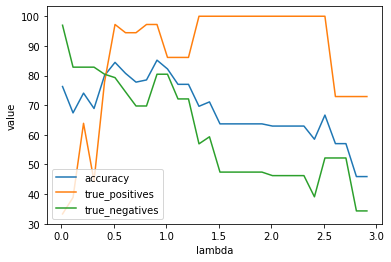

In [8]:
list_loss=[]
list_accuracy=[]
list_true_positives=[]
list_true_negatives=[]

lambdas = np.arange(0.01, 3, 0.1)

for lmbd in lambdas:
    
    #print("Hyper parameter lambda:", lmbd)
    
    loss, accuracy, true_positives, true_negatives = test_svm(features, targets, svm_lambda=lmbd)
    
    list_loss.append(loss)
    list_accuracy.append(accuracy)
    list_true_positives.append(true_positives)
    list_true_negatives.append(true_negatives)
    
    #print("\n")
    
#plt.plot(lambdas, list_loss,label="loss")
plt.plot(lambdas, list_accuracy, label="accuracy")
plt.plot(lambdas, list_true_positives, label="true_positives")
plt.plot(lambdas, list_true_negatives, label="true_negatives")
plt.ylabel('value')
plt.xlabel('lambda')
plt.legend()